In [3]:
from SimPEG import *
from SimPEG import EM
from scipy.constants import mu_0
from pymatsolver import PardisoSolver
import numpy as np
# from SimPEG.Problem import GlobalProblem as GlobalProblem

In [4]:
from scipy.constants import mu_0
def genTensorMesh(locs, sigma=1e-3, t=1e-2, dx=np.r_[50., 50., 50.], ncx=5,ncy=5,ncz=4,npad=8):    
    difdist = np.sqrt(2*t/mu_0/sigma)
    hx = [(dx[0],npad,-1.3), (dx[0],ncx), (dx[0],npad,1.3)]
    hy = [(dx[1],npad,-1.3), (dx[1],ncy), (dx[1],npad,1.3)]
#     hz = [(dx[2],npad,-1.3), (dx[2],ncz),(dx[2]*0.5, 4),(dx[2],ncz),(dx[2],npad,1.3)]
    hz = [(dx[2],npad-2,-1.3), (dx[2],ncz), (dx[2],ncz),(dx[2],npad-2,1.3)]    
    mesh = Mesh.TensorMesh([hx, hy, hz], x0="CCC")
    mesh._x0 += locs
    return mesh    

In [5]:
hx = np.ones(10)*50
meshsurvey = Mesh.TensorMesh([hx], "C")
locs = np.c_[meshsurvey.gridCC, np.ones(meshsurvey.nC)*0., np.ones(meshsurvey.nC)]
itx = Utils.closestPoints(meshsurvey, np.r_[0.])[0]

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Step1: set up survey

In [7]:
# mesh = Mesh.TensorMesh.readUBC("./models/mesh_composite.msh")
# sigma = mesh.readModelUBC("./models/sigmaInf_composite_cond.con")

In [8]:
cs, ncx, ncy, ncz, npad = 50., 12, 12, 16, 8
hx = [(cs,npad,-1.3), (cs,ncx), (cs,npad,1.3)]
hy = [(cs,npad,-1.3), (cs,ncy), (cs,npad,1.3)]
hz = [(cs,npad,-1.3), (cs,ncz), (cs,npad,1.3)]

In [9]:
mesh = Mesh.TensorMesh([hx, hy, hz], "CCC")

In [10]:
sigma = np.ones(mesh.nC)*1e-8
sigma[mesh.gridCC[:,2]<0.] = 1e-3
blk = Utils.ModelBuilder.getIndicesBlock(np.r_[-100., 100., -50.], np.r_[100., -100., -250.], mesh.gridCC)
sigma[blk] = 1e-1

-125.0


(-1200, 1200)

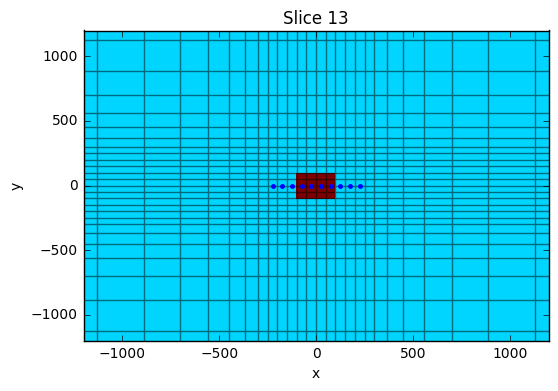

In [11]:
print mesh.vectorCCz[13]
mesh.plotSlice(np.log10(sigma), ind=13, grid=True, clim=(-4, -1))
plt.plot(locs[:,0], locs[:,1], '.')
xlim(-1200, 1200)
ylim(-1200, 1200)

-125.0


(-1200, 0.0)

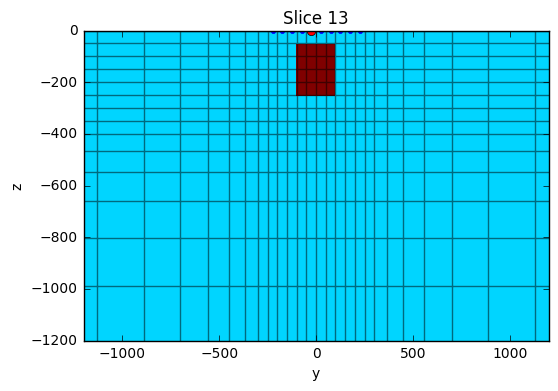

In [12]:
print mesh.vectorCCz[13]
mesh.plotSlice(np.log10(sigma), ind=13,normal='X', grid=True, clim=(-4, -1))
plt.plot(locs[:,0], locs[:,1], '.')
plt.plot(locs[itx,0], locs[itx,1], 'ro')
xlim(-1200, 1200)
ylim(-1200, 0.)

## Generate submeshes and mapping

In [13]:
submeshes = []
submaps = []
ntx = locs.shape[0]
inactind = mesh.gridCC[:,2] > 0.
for itx in range(ntx):
    meshsub = genTensorMesh(locs[itx,:])
    inactindsub = meshsub.gridCC[:,2] > 0.
    M2Mmap = Maps.Mesh2MeshTopo([mesh, meshsub], [~inactind, ~inactindsub])
    actmap = Maps.ActiveCells(meshsub, ~inactindsub, 1e-8)
#     expmap = Maps.ExpMap(meshsub)
#     mapping = expmap*actmap*M2Mmap
    mapping = actmap*M2Mmap
    submaps.append(mapping)
    submeshes.append(meshsub)

/Users/sgkang/Projects/simpeg/SimPEG/Maps.py:1489: FutureWarning: `ActiveCells` is deprecated and will be removed in future versions. Use `InjectActiveCells` instead
  FutureWarning)


In [14]:
def fun(itx=0):
#     itx = 3
    condsub = submaps[itx]*sigma[~inactind]
    print submeshes[itx].vectorCCz[7]
    submeshes[itx].plotSlice(np.log10(condsub), ind=7, grid=True, clim=(-4, -1))
    plt.plot(locs[:,0], locs[:,1], '.')
    plt.plot(locs[itx,0], locs[itx,1], 'ro')
    xlim(-1200, 1200)
    ylim(-1200, 1200)


In [15]:
from ipywidgets import interact

-124.0


<function __main__.fun>

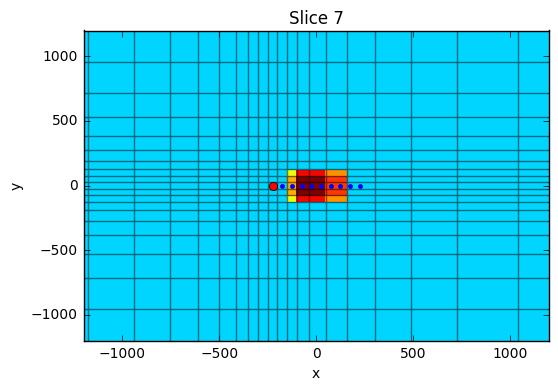

In [16]:
interact(fun, itx=(0, 9, 1))

-124.0


(-500, 50.0)

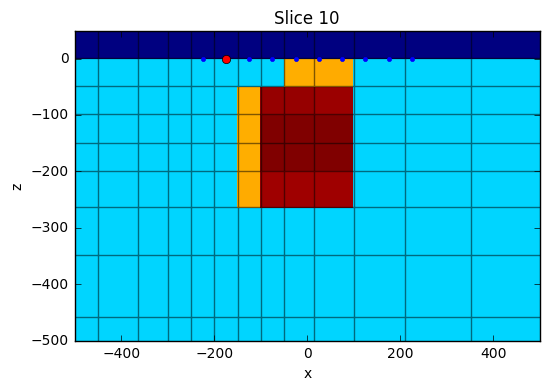

In [17]:
itx = 1
condsub = submaps[itx]*sigma[~inactind]
print submeshes[itx].vectorCCz[7]
submeshes[itx].plotSlice(np.log10(condsub), normal='Y', grid=True, clim=(-4, -1))
plt.plot(locs[:,0], locs[:,1], '.')
plt.plot(locs[itx,0], locs[itx,1], 'ro')
xlim(-500, 500)
ylim(-500, 50.)

-124.0


(-500, 50.0)

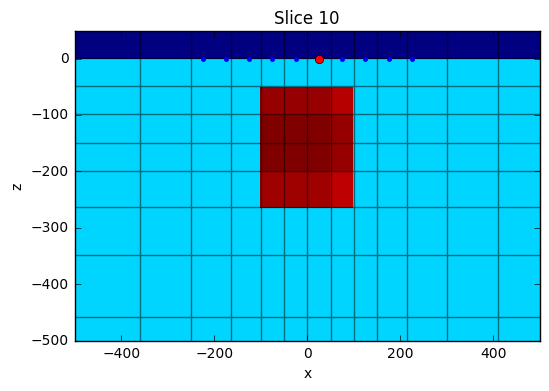

In [18]:
itx = 5
condsub = submaps[itx]*sigma[~inactind]
print submeshes[itx].vectorCCz[7]
submeshes[itx].plotSlice(np.log10(condsub), normal='Y', grid=True, clim=(-4, -1))
plt.plot(locs[:,0], locs[:,1], '.')
plt.plot(locs[itx,0], locs[itx,1], 'ro')
xlim(-500, 500)
ylim(-500, 50.)